In [8]:
import sys
 
 
print("User Current Version:-", sys.version)

User Current Version:- 3.10.8 | packaged by conda-forge | (main, Nov 24 2022, 14:07:00) [MSC v.1916 64 bit (AMD64)]


In [66]:
import pandas as pd
data=pd.read_csv('D:/[AppliedAI] Machine Learning Online Course/Module 2. Data Science. Exploratory Data Analysis and Data Visualization/1. Plotting for exploratory data analysis (EDA)/16.2. haberman.csv')

In [67]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
(data.status.value_counts()/data.shape[0])*100

1    73.529412
2    26.470588
Name: status, dtype: float64

#### The data is imbalanced. There is no problem doing Data Analysis on imbalanced data. But for buildind model, we need to rebalance it.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
data.status.astype('category')

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: status, Length: 306, dtype: category
Categories (2, int64): [1, 2]

In [10]:
data.shape

(306, 4)

# Univariate Analysis

In [18]:
data.groupby('status').mean()

,age,year,nodes
status,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


## 1. Year

<AxesSubplot: xlabel='year', ylabel='Density'>

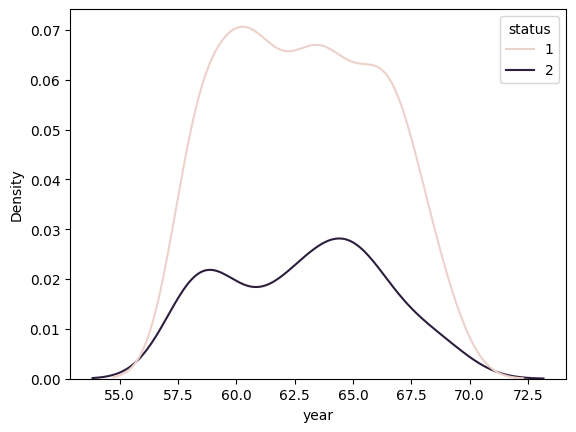

In [21]:
import seaborn as sns
sns.kdeplot(data=data,x='year',hue='status')

In [33]:
import pandas as pd
pd.crosstab(data.status,data.year).apply(lambda row: (row/row.sum())*100 ,axis=0)

year,58,59,60,61,62,63,64,65,66,67,68,69
status,,,,,,,,,,,,
1,66.666667,66.666667,85.714286,88.461538,69.565217,73.333333,74.193548,53.571429,78.571429,84.0,76.923077,63.636364
2,33.333333,33.333333,14.285714,11.538462,30.434783,26.666667,25.806452,46.428571,21.428571,16.0,23.076923,36.363636


In [42]:
from scipy.stats import chi2_contingency
import pandas as pd
cross=pd.crosstab(data.status,data.year)
chiobs, pvalue, dof, expected = chi2_contingency(cross)
pvalue

0.184049437523969

<AxesSubplot: xlabel='status', ylabel='year'>

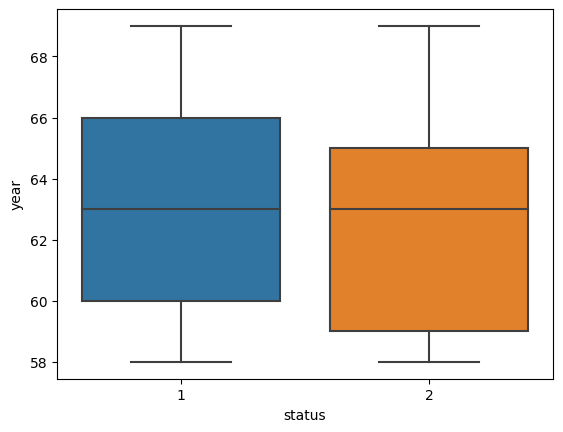

In [74]:
sns.boxplot(data=data,x='status',y='year')

### So Year is not a important feature

## 2. Age

<AxesSubplot: xlabel='age', ylabel='Density'>

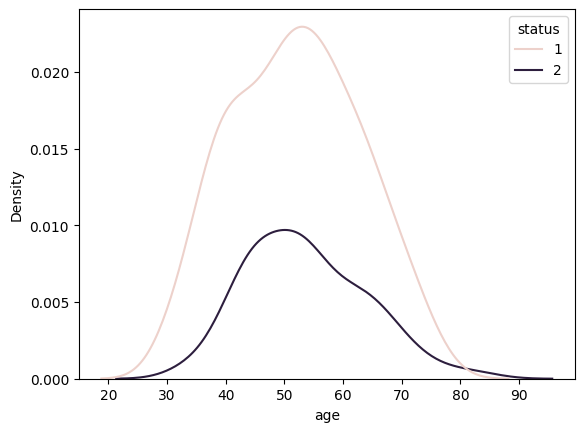

In [34]:
sns.kdeplot(data=data,x='age',hue='status')

<AxesSubplot: xlabel='age', ylabel='Proportion'>

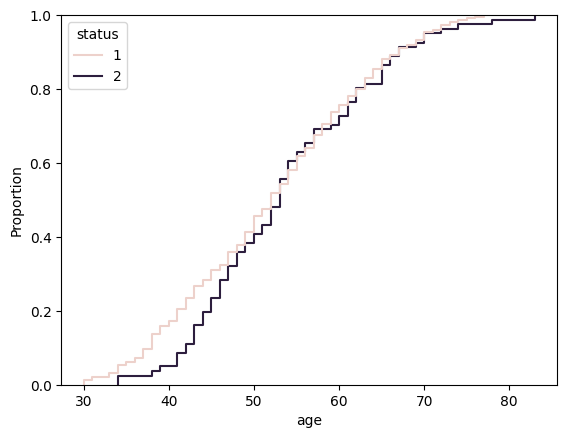

In [86]:
sns.ecdfplot(x='age', data=data, hue='status')

<AxesSubplot: xlabel='status', ylabel='age'>

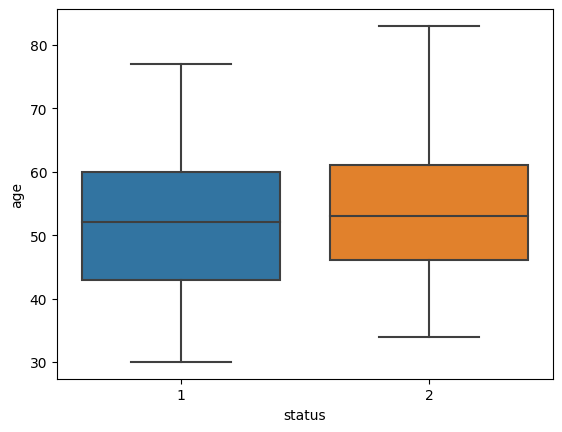

In [46]:
sns.boxplot(data=data,x='status',y='age')

### age is also not important feature

## 3. Nodes

<AxesSubplot: xlabel='nodes', ylabel='Density'>

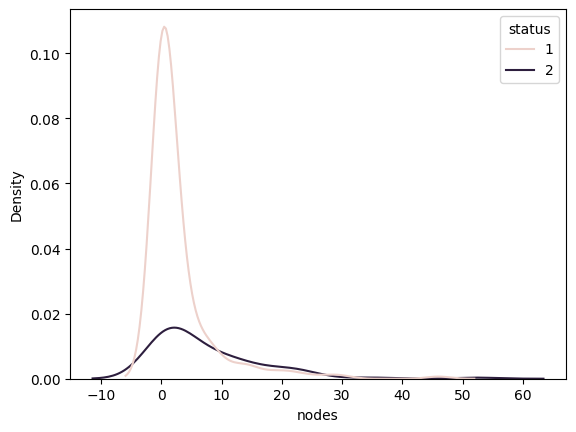

In [48]:
sns.kdeplot(data=data,x='nodes',hue='status')

<AxesSubplot: xlabel='nodes', ylabel='Proportion'>

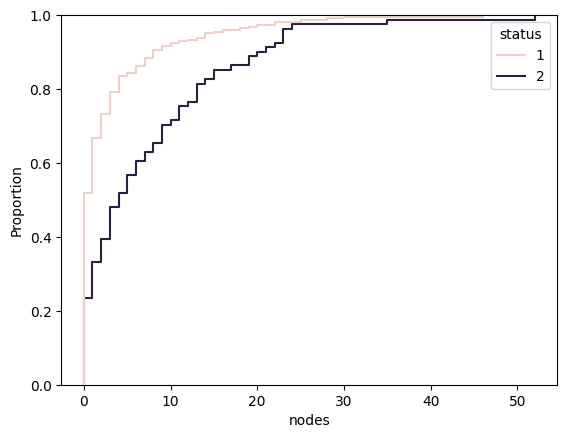

In [73]:
sns.ecdfplot(x='nodes', data=data, hue='status')

<AxesSubplot: xlabel='status', ylabel='nodes'>

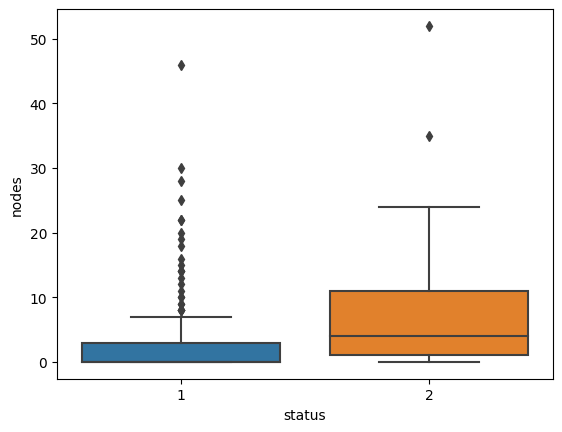

In [50]:
sns.boxplot(data=data,y='nodes',x='status')

In [56]:
new=data[(data.nodes<40)]

<AxesSubplot: xlabel='status', ylabel='nodes'>

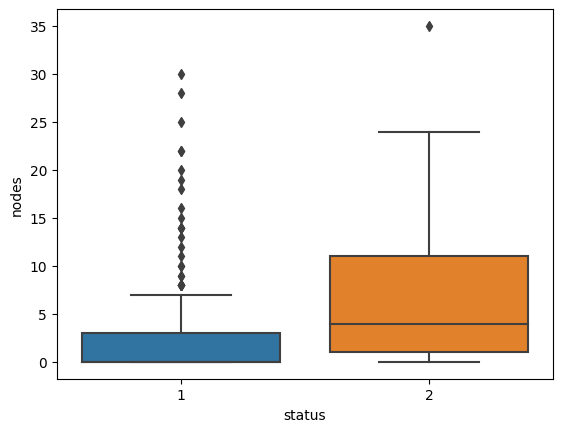

In [57]:
sns.boxplot(data=new,y='nodes',x='status')

In [58]:
# 1. So there is no impact of removing the outliers >40 on other outliers

#####  Nodes is also not very helpful but better than year and age.

As we can see from the Box plot and CDF, the class 1 is more dense in terms of nodes. most of people who survived had 1-5 nodes.
On the other hand class 2 is more spread and the dead patients had nodes in a wide range

a. Almost 83% of patients who survived have less than 5 nodes.

b. 50% of people who died had greater than 5 nodes

c. so, if we use only this feature for model, then: if `nodes>5` then status=2, else status=1.

   We can say that if we choose 5 as our condition to seperate status 1 and 2, then 83% of times we will be correct to classify status=1 and 13% times incorrect. Similary 50% times we will correct to classify Status=2 and 50% times, we can be incorrect

# Multivariate Analysis

<AxesSubplot: xlabel='nodes', ylabel='age'>

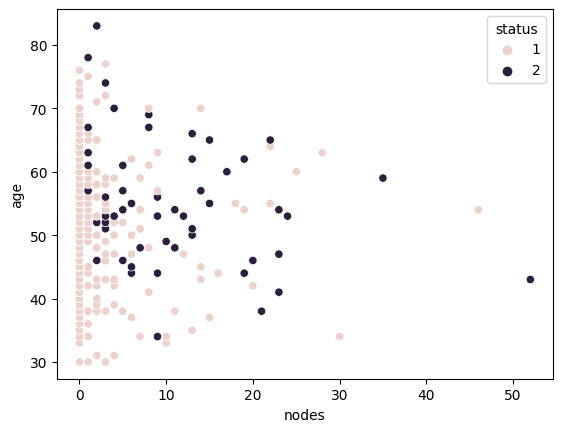

In [60]:
sns.scatterplot(data=data,y='age',x='nodes',hue='status')

In [77]:
pd.crosstab(data.status,data.year,values=data.age,aggfunc='mean')

year,58,59,60,61,62,63,64,65,66,67,68,69
status,,,,,,,,,,,,
1,51.333333,49.722222,46.375,53.260870,52.750000,49.818182,52.434783,50.600000,55.045455,55.047619,61.700000,50.0
2,58.166667,49.777778,52.750,62.666667,55.285714,54.625000,49.250000,57.153846,48.500000,50.750000,56.666667,44.5


In [79]:
pd.crosstab(data.status,data.year,values=data.nodes,aggfunc='mean')

year,58,59,60,61,62,63,64,65,66,67,68,69
status,,,,,,,,,,,,
1,2.375000,3.111111,1.75,4.173913,2.3125,2.50,2.086957,2.733333,2.909091,4.095238,0.600000,5.714286
2,7.916667,5.888889,11.00,6.666667,12.0000,10.75,3.125000,7.615385,5.166667,4.000000,7.666667,7.000000


In [85]:
data[data.year<64].groupby('status').mean()

,age,year,nodes
status,,,
1,50.433071,60.433071,2.700787
2,55.093023,60.186047,8.883721


In [ ]:
# We can clearly see, the patients who had operation before 1964 and died had higher nodes (i.e. 9) compared to survied( i.e. 3)
# After 1964 , we cannot clearly seperate status using nodes